In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# use citipy to find the nearest city
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [7]:
# Import the requests library.
import requests

# Import the API key.
import sys
sys.path.append('/Users/katiemtroll/Desktop/API_Keys')
from api_keys import key_open_weather
api_key = key_open_weather

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 45.03,
  'feels_like': 44.06,
  'temp_min': 38.88,
  'temp_max': 51.04,
  'pressure': 1003,
  'humidity': 96},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 33, 'gust': 11.99},
 'clouds': {'all': 100},
 'dt': 1641153619,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1641125609,
  'sunset': 1641158566},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Get the JSON data.
boston_data = city_weather.json()

In [11]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1641125609,
 'sunset': 1641158566}

In [12]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 51.04 96 100 3


In [13]:
# convert the datetime stamp
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 1, 2, 20, 0, 19)

In [14]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-02 20:00:19'

In [15]:
# now let's get the data for all of our cities
# We will need to do the following:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
# - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
# - City, country, and date
# - Latitude and longitude
# - Maximum temperature
# - Humidity
# - Cloudiness
# - Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
# enumerate to get the index in a way that can log in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # time sleep to prevent time-out error (only 60 calls per minute allowed on OpenWeather free tier)
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | bismarck
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | port blair
Processing Record 7 of Set 1 | iquitos
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | davila
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | vysokogornyy
Processing Record 15 of Set 1 | kunri
Processing Record 16 of Set 1 | padang
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | la asuncion
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | batemans bay
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping.

Processing Record 38 of Set 4 | mogadishu
Processing Record 39 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 40 of Set 4 | eskisehir
Processing Record 41 of Set 4 | dingle
Processing Record 42 of Set 4 | canala
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | keetmanshoop
Processing Record 45 of Set 4 | harper
Processing Record 46 of Set 4 | ust-nera
Processing Record 47 of Set 4 | mayumba
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | dok kham tai
Processing Record 50 of Set 4 | mareeba
Processing Record 1 of Set 5 | puerto escondido
Processing Record 2 of Set 5 | macedo de cavaleiros
Processing Record 3 of Set 5 | kalmunai
Processing Record 4 of Set 5 | san rafael del sur
Processing Record 5 of Set 5 | afmadu
City not found. Skipping...
Processing Record 6 of Set 5 | visby
Processing Record 7 of Set 5 | baripada
Processing Record 8 of Set 5 | comodoro rivadavia
Processing Record 9 of Set 5 | henties bay
Proc

Processing Record 25 of Set 8 | quelimane
Processing Record 26 of Set 8 | sept-iles
Processing Record 27 of Set 8 | mitu
Processing Record 28 of Set 8 | karasuk
Processing Record 29 of Set 8 | jizan
Processing Record 30 of Set 8 | wad rawah
Processing Record 31 of Set 8 | tartagal
Processing Record 32 of Set 8 | great bend
Processing Record 33 of Set 8 | new baltimore
Processing Record 34 of Set 8 | dunedin
Processing Record 35 of Set 8 | kidal
Processing Record 36 of Set 8 | khujner
Processing Record 37 of Set 8 | ust-ilimsk
Processing Record 38 of Set 8 | andahuaylas
Processing Record 39 of Set 8 | prince rupert
Processing Record 40 of Set 8 | resistencia
Processing Record 41 of Set 8 | kyra
Processing Record 42 of Set 8 | fairbanks
Processing Record 43 of Set 8 | alto araguaia
Processing Record 44 of Set 8 | alyangula
Processing Record 45 of Set 8 | cockburn town
Processing Record 46 of Set 8 | jiehu
Processing Record 47 of Set 8 | rungata
City not found. Skipping...
Processing Reco

Processing Record 16 of Set 12 | vredendal
Processing Record 17 of Set 12 | inuvik
Processing Record 18 of Set 12 | shibarghan
City not found. Skipping...
Processing Record 19 of Set 12 | rio gallegos
Processing Record 20 of Set 12 | nokia
Processing Record 21 of Set 12 | nieuw amsterdam
Processing Record 22 of Set 12 | la brea
Processing Record 23 of Set 12 | tamandare
Processing Record 24 of Set 12 | godeni
Processing Record 25 of Set 12 | daru
Processing Record 26 of Set 12 | iquique
Processing Record 27 of Set 12 | santa cruz del sur
Processing Record 28 of Set 12 | capreol
Processing Record 29 of Set 12 | dana point
Processing Record 30 of Set 12 | yirol
City not found. Skipping...
Processing Record 31 of Set 12 | cuauhtemoc
Processing Record 32 of Set 12 | miracema do tocantins
Processing Record 33 of Set 12 | dongsheng
Processing Record 34 of Set 12 | carberry
Processing Record 35 of Set 12 | sunamganj
City not found. Skipping...
Processing Record 36 of Set 12 | valparaiso
Proce

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,76.59,80,43,11.36,RE,2022-01-02 20:00:29
1,Ushuaia,-54.8000,-68.3000,45.73,49,67,15.90,AR,2022-01-02 20:00:30
2,Bismarck,46.8083,-100.7837,23.81,72,1,1.99,US,2022-01-02 20:00:01
3,Rikitea,-23.1203,-134.9692,77.47,71,19,9.26,PF,2022-01-02 20:00:30
4,Albany,42.6001,-73.9662,37.80,92,100,1.99,US,2022-01-02 19:56:39
5,Port Blair,11.6667,92.7500,78.71,74,29,10.25,IN,2022-01-02 20:00:31
6,Iquitos,-3.7481,-73.2472,88.52,56,94,4.54,PE,2022-01-02 20:00:32
7,Barrow,71.2906,-156.7887,-27.85,100,53,5.59,US,2022-01-02 19:56:08
8,Bambous Virieux,-20.3428,57.7575,76.21,78,20,5.75,MU,2022-01-02 20:00:32
9,New Norfolk,-42.7826,147.0587,56.70,81,100,1.54,AU,2022-01-02 20:00:33


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-01-02 20:00:29,-21.3585,55.7679,76.59,80,43,11.36
1,Ushuaia,AR,2022-01-02 20:00:30,-54.8000,-68.3000,45.73,49,67,15.90
2,Bismarck,US,2022-01-02 20:00:01,46.8083,-100.7837,23.81,72,1,1.99
3,Rikitea,PF,2022-01-02 20:00:30,-23.1203,-134.9692,77.47,71,19,9.26
4,Albany,US,2022-01-02 19:56:39,42.6001,-73.9662,37.80,92,100,1.99
5,Port Blair,IN,2022-01-02 20:00:31,11.6667,92.7500,78.71,74,29,10.25
6,Iquitos,PE,2022-01-02 20:00:32,-3.7481,-73.2472,88.52,56,94,4.54
7,Barrow,US,2022-01-02 19:56:08,71.2906,-156.7887,-27.85,100,53,5.59
8,Bambous Virieux,MU,2022-01-02 20:00:32,-20.3428,57.7575,76.21,78,20,5.75
9,New Norfolk,AU,2022-01-02 20:00:33,-42.7826,147.0587,56.70,81,100,1.54


In [4]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [8]:
# re-import dependencies and read in the CSV so as to not run the city data again.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
data_df = pd.read_csv("weather_data/cities.csv")
data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Saint-Philippe,RE,2022-01-02 20:00:29,-21.3585,55.7679,76.59,80,43,11.36
1,1,Ushuaia,AR,2022-01-02 20:00:30,-54.8000,-68.3000,45.73,49,67,15.90
2,2,Bismarck,US,2022-01-02 20:00:01,46.8083,-100.7837,23.81,72,1,1.99
3,3,Rikitea,PF,2022-01-02 20:00:30,-23.1203,-134.9692,77.47,71,19,9.26
4,4,Albany,US,2022-01-02 19:56:39,42.6001,-73.9662,37.80,92,100,1.99


In [9]:
# Extract relevant fields from the DataFrame to create a scatter plot.
lats = data_df["Lat"]
max_temps = data_df["Max Temp"]
humidity = data_df["Humidity"]
cloudiness = data_df["Cloudiness"]
wind_speed = data_df["Wind Speed"]

In [10]:
# Set the date of the scatterplot.
today = time.strftime("%x")
today

'01/02/22'

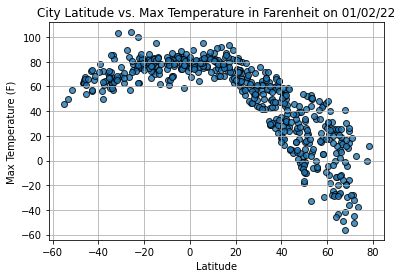

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature in Farenheit on "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

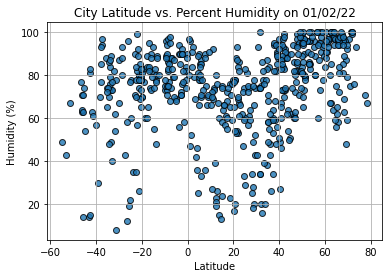

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Percent Humidity on "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

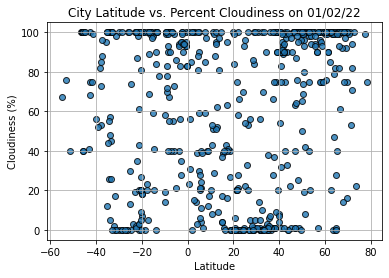

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Percent Cloudiness on "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

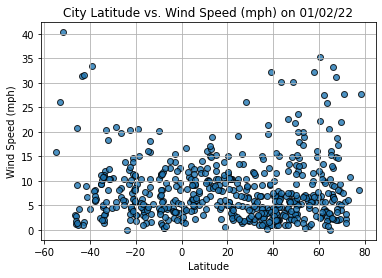

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) on "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# how to return all of the values of a certain index
index13 = data_df.loc[13]
index13

City_ID                        13
City                 Vysokogornyy
Country                        RU
Date          2022-01-02 20:00:35
Lat                       50.1167
Lng                        139.15
Max Temp                   -18.22
Humidity                       99
Cloudiness                     99
Wind Speed                   3.31
Name: 13, dtype: object

In [20]:
# filter for all of the northern latitudes (> 90)
data_df["Lat"]>=0

0      False
1      False
2       True
3      False
4       True
       ...  
546     True
547    False
548    False
549    False
550    False
Name: Lat, Length: 551, dtype: bool

In [24]:
# return a dataframe with all data fitting the criteria
NorthernHem_df = data_df.loc[(data_df["Lat"]>=0)]
SouthernHem_df = data_df.loc[(data_df["Lat"]<0)]

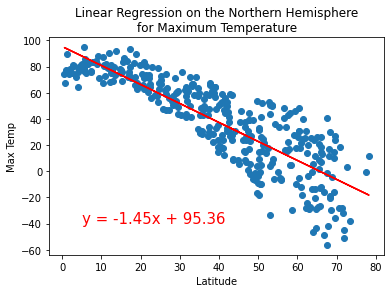

In [35]:
# perform linear regression on the northern hemisphere
# Linear regression on the Northern Hemisphere
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(5,-40))

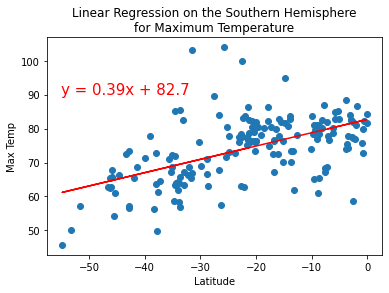

In [36]:
# Linear regression on the Southern Hemisphere
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-55,90))

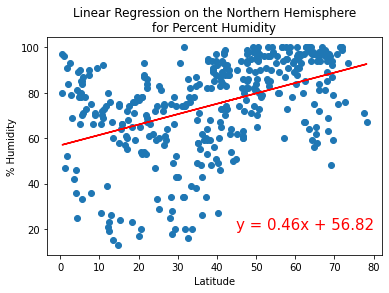

In [42]:
# Linear regression on the Northern Hemisphere Humidity
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Percent Humidity', '% Humidity',(45,20))

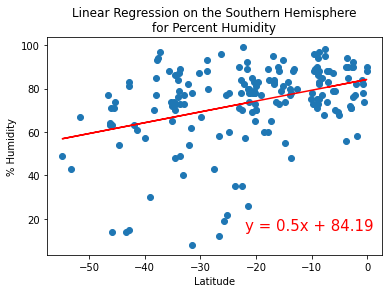

In [55]:
# Linear regression on the Southern Hemisphere Humidity
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Percent Humidity', '% Humidity',(-22,15))

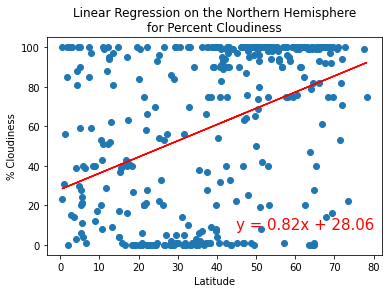

In [56]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Percent Cloudiness', '% Cloudiness',(45,8))

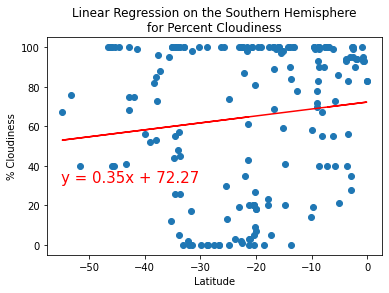

In [65]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Percent Cloudiness', '% Cloudiness',(-55,32))

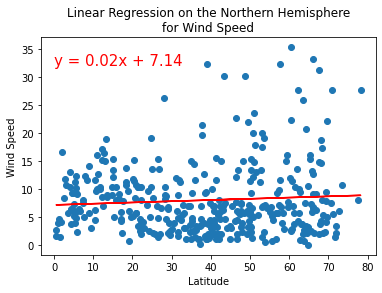

In [67]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(0,32))

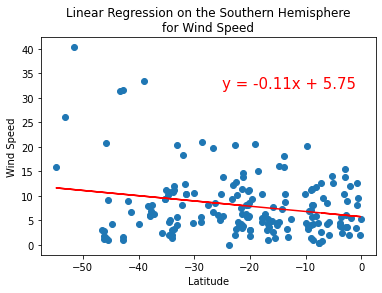

In [71]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-25,32))